Saving Weather Data Set.csv to Weather Data Set (5).csv
Shape: (145460, 23)
Data Types:
 Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object
Head:
          Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2010-04-30  Adelaide     10.8     21.2       0.0          1.8      6.60   
1  2014-07-22  Adelaide      3.7     19.0       0.0          1.4      7.61   
2  2014-07-23  Adelaide      9.6     15.8       0.0          2.6      7.61   
3  

/tmp/ipython-input-3995220484.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print("Missing by Location:\n", df.groupby('Location').apply(lambda x: x.isnull().sum()))


Missing by Location:
                   Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
Location                                                                    
Adelaide             0         0        0        0         0            0   
Albany               0         0        0        0         0            0   
Albury               0         0        0        0         0            0   
AliceSprings         0         0        0        0         0            0   
BadgerysCreek        0         0        0        0         0            0   
Ballarat             0         0        0        0         0            0   
Bendigo              0         0        0        0         0            0   
Brisbane             0         0        0        0         0            0   
Cairns               0         0        0        0         0            0   
Canberra             0         0        0        0         0            0   
Cobar                0         0        0        0    

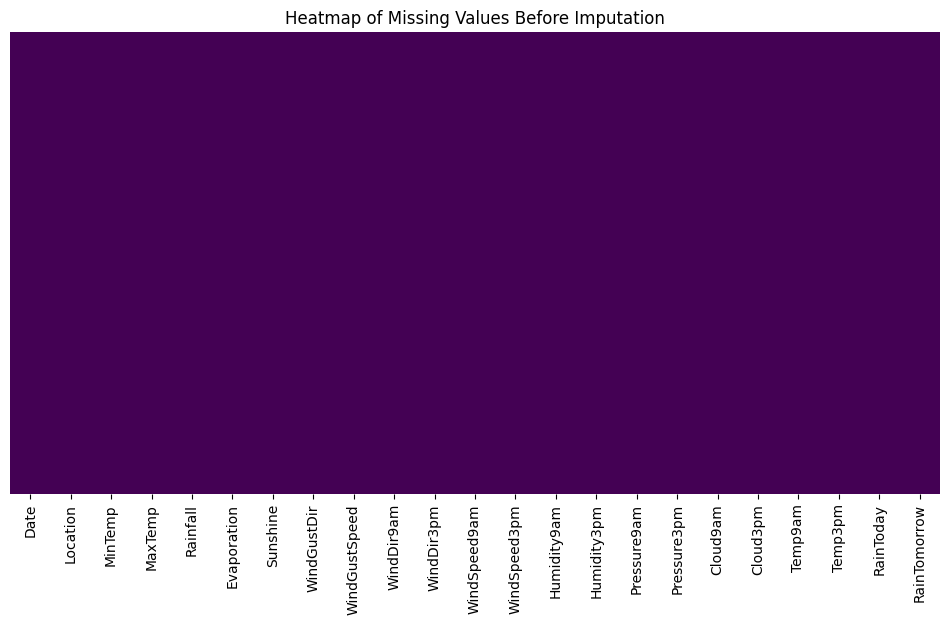

No missing values to plot before imputation.
Missing After Imputation:
 Series([], dtype: float64)


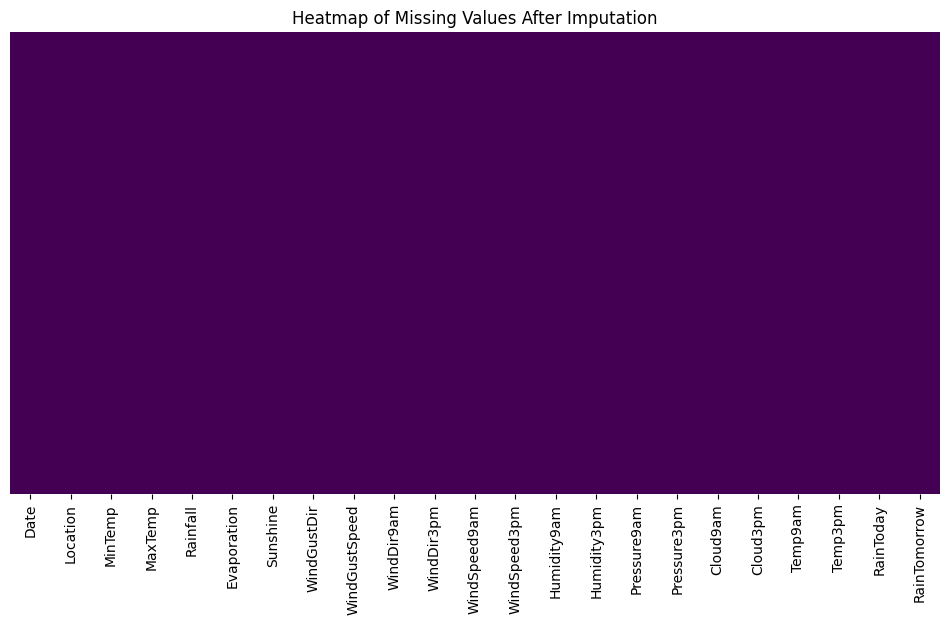

No missing values to plot after imputation.
Data cleaning completed. DataFrame shape: (145460, 23)
Cleaned data saved as 'cleaned_weather_data.csv'


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Initial inspection
print("Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Head:\n", df.head())
print("Describe:\n", df.describe())

# Parse Date
df['Date'] = pd.to_datetime(df['Date'])

# EDA: Summarize missing value percentages
missing = df.isnull().sum() / len(df) * 100
print("Missing Percentages:\n", missing[missing > 0].sort_values(ascending=False))

# Analyze patterns (check the missingness depends on the features)
print("Missing by Location:\n", df.groupby('Location').apply(lambda x: x.isnull().sum()))
print("Missing where RainTomorrow='Yes':\n", df[df['RainTomorrow'] == 'Yes'].isnull().sum())

# Visualizations - Before Imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values Before Imputation')
plt.show()

# Plot missing percentages before imputation if there are any
if not missing[missing > 0].empty:
    missing[missing > 0].plot(kind='bar')
    plt.title('Bar Plot of Missing Percentages Before Imputation')
    plt.ylabel('Percentage Missing')
    plt.show()
else:
    print("No missing values to plot before imputation.")


# Preprocessing: Handle missing values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns.drop(['RainTomorrow', 'RainToday'])

# Impute numerical with median, categorical with mode
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop if >50% missing (unlikely here)
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Verify missing values after imputation
missing_after_imputation = df.isnull().sum() / len(df) * 100
print("Missing After Imputation:\n", missing_after_imputation[missing_after_imputation > 0].sort_values(ascending=False))


# Visualizations - After Imputation
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

# Only attempt to plot if there are missing values after imputation
if not missing_after_imputation[missing_after_imputation > 0].empty:
    missing_after_imputation[missing_after_imputation > 0].plot(kind='bar')
    plt.title('Bar Plot of Missing Percentages After Imputation')
    plt.ylabel('Percentage Missing')
    plt.show()
else:
    print("No missing values to plot after imputation.")


print("Data cleaning completed. DataFrame shape:", df.shape)

# Save the cleaned dataframe for the next member
df.to_csv('cleaned_weather_data.csv', index=False)
print("Cleaned data saved as 'cleaned_weather_data.csv'")